# Zestaw zadań: Równania różniczkowe - spectral bias
## Zadanie 1
### Autor: Artur Gęsiarz

In [8]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

### Definicja analitycznego rozwiązania

In [9]:
def exact_solution(x, w):
    return (1/w) * torch.sin(w * x)

### Definicja sieci neuronowej

In [10]:
class FCN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN, N_LAYERS):
        super().__init__()
        activation = nn.Tanh
        self.fcs = nn.Sequential(*[
                        nn.Linear(N_INPUT, N_HIDDEN),
                        activation()])
        self.fch = nn.Sequential(*[
                        nn.Sequential(*[
                            nn.Linear(N_HIDDEN, N_HIDDEN),
                            activation()]) for _ in range(N_LAYERS-1)])
        self.fce = nn.Linear(N_HIDDEN, N_OUTPUT)
    def forward(self, x):
        x = self.fcs(x)
        x = self.fch(x)
        x = self.fce(x)
        return x

### Funkcja treningowa PINN

In [11]:
def train_PINN(model, x_boundary, x_physics, w, epochs=50000, lr=0.001):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    losses = []

    for i in range(epochs):
        optimizer.zero_grad()

        # Koszt warunku początkowego
        u0 = model(x_boundary)
        loss_ic = u0**2

        # Koszt rezydualny
        u = model(x_physics)
        du_dx = torch.autograd.grad(u, x_physics, torch.ones_like(u), create_graph=True)[0]
        residual = du_dx - torch.cos(w * x_physics)
        loss_r = torch.mean(residual**2)

        # Łączny koszt
        loss = loss_ic + loss_r
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

        if i % 5000 == 0:
            print(f'Epoch {i}, Loss: {loss.item()}')

    return losses

### Funkcja do rysowania wyników

In [12]:
def plot_results(x_test, u_exact, u_pred, losses, title):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(x_test, u_exact, label='Exact solution')
    plt.plot(x_test, u_pred, '--', label='PINN solution')
    plt.xlabel('x')
    plt.ylabel('u(x)')
    plt.title('Solution')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss')

    plt.suptitle(title)
    plt.show()

### Parametry naszego modelu

In [13]:
w_values = [1, 15]
architectures = [(2, 16), (4, 64), (5, 128)]
train_points = [200, 3000]
test_points = [1000, 5000]

### Uruchomienie calego modelu

Training for w = 1, Layers = 2, Neurons = 16
Epoch 0, Loss: 0.5524866580963135
Epoch 5000, Loss: 3.993383143097162e-05
Epoch 10000, Loss: 8.592089579906315e-05
Epoch 15000, Loss: 4.200779130769661e-06
Epoch 20000, Loss: 2.9034381441306323e-06
Epoch 25000, Loss: 2.471807647452806e-06
Epoch 30000, Loss: 7.62520858188509e-06
Epoch 35000, Loss: 1.985442168006557e-06
Epoch 40000, Loss: 1.7544010688652634e-06
Epoch 45000, Loss: 4.5128422243578825e-06


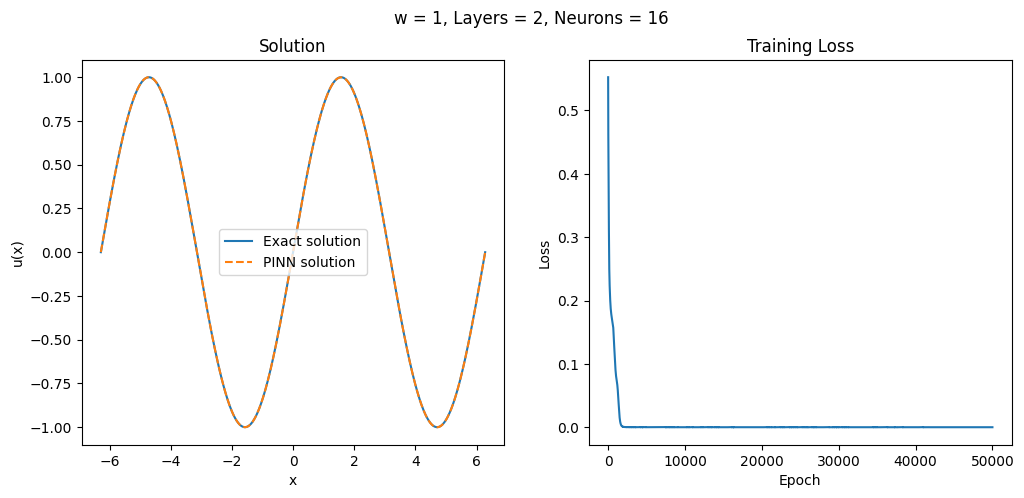

Training for w = 1, Layers = 4, Neurons = 64
Epoch 0, Loss: 0.5035058259963989
Epoch 5000, Loss: 2.4366372599615715e-06
Epoch 10000, Loss: 6.238136620595469e-07
Epoch 15000, Loss: 9.23708910249843e-07
Epoch 20000, Loss: 1.163714568974683e-05
Epoch 25000, Loss: 7.281638403355828e-08
Epoch 30000, Loss: 1.1668856814139872e-06
Epoch 35000, Loss: 1.4219363947631791e-05
Epoch 40000, Loss: 5.222328763920814e-05
Epoch 45000, Loss: 1.7667727661319077e-05


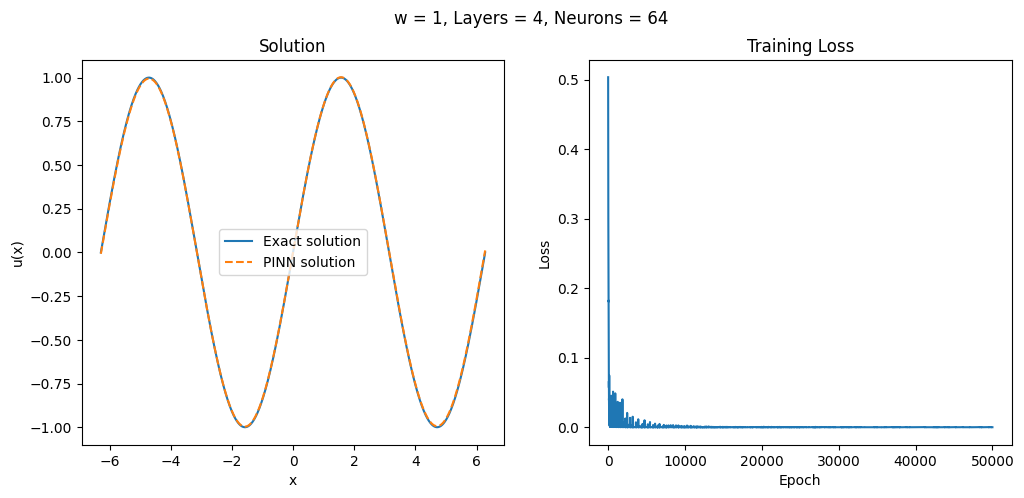

Training for w = 1, Layers = 5, Neurons = 128
Epoch 0, Loss: 0.5073103904724121
Epoch 5000, Loss: 0.0004658455727621913
Epoch 10000, Loss: 1.0009340485339635e-06
Epoch 15000, Loss: 3.694629526762583e-07
Epoch 20000, Loss: 2.004985071835108e-05
Epoch 25000, Loss: 7.75153239374049e-08
Epoch 30000, Loss: 0.00019891162810381502
Epoch 35000, Loss: 1.3954746691524633e-07
Epoch 40000, Loss: 5.922778711919818e-08
Epoch 45000, Loss: 7.575522431579884e-08


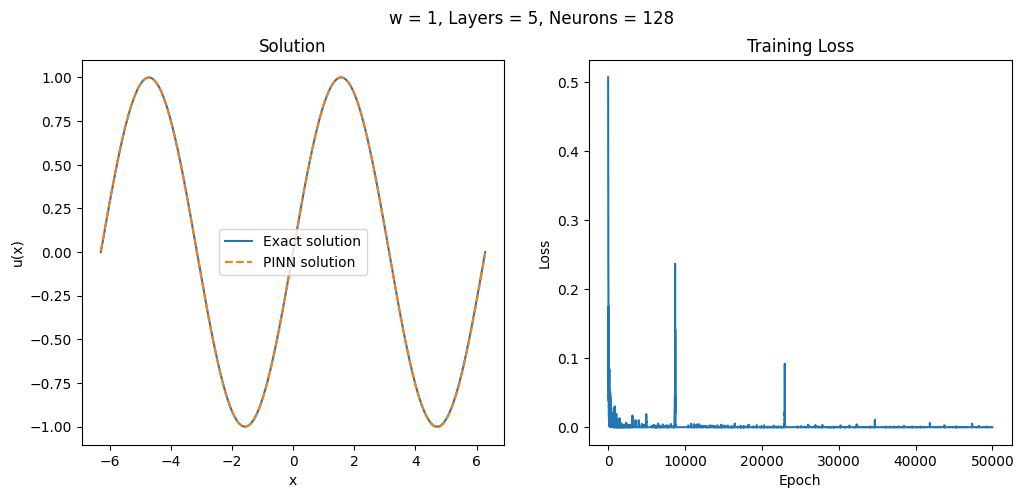

Training for w = 15, Layers = 2, Neurons = 16
Epoch 0, Loss: 0.5082722306251526
Epoch 5000, Loss: 0.50015789270401
Epoch 10000, Loss: 0.5001492500305176
Epoch 15000, Loss: 0.5001236796379089
Epoch 20000, Loss: 0.5000385046005249
Epoch 25000, Loss: 0.48038211464881897
Epoch 30000, Loss: 0.45950403809547424
Epoch 35000, Loss: 0.4331428110599518
Epoch 40000, Loss: 0.38377946615219116
Epoch 45000, Loss: 0.3609645366668701


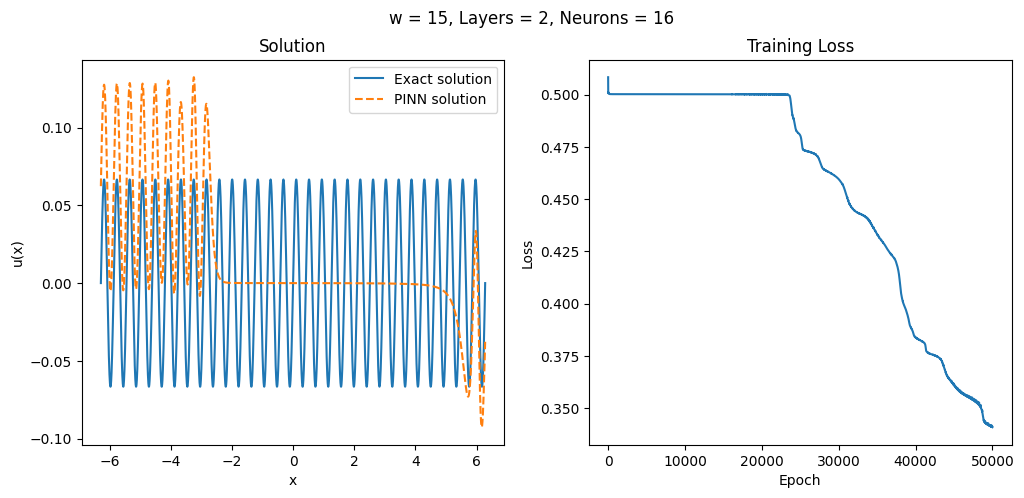

Training for w = 15, Layers = 4, Neurons = 64
Epoch 0, Loss: 0.5011277198791504
Epoch 5000, Loss: 0.5001577734947205
Epoch 10000, Loss: 0.5001631379127502
Epoch 15000, Loss: 0.5001621246337891
Epoch 20000, Loss: 0.500163197517395
Epoch 25000, Loss: 0.5001612305641174
Epoch 30000, Loss: 0.5001528263092041
Epoch 35000, Loss: 0.2320883721113205
Epoch 40000, Loss: 0.16042660176753998
Epoch 45000, Loss: 0.13231688737869263


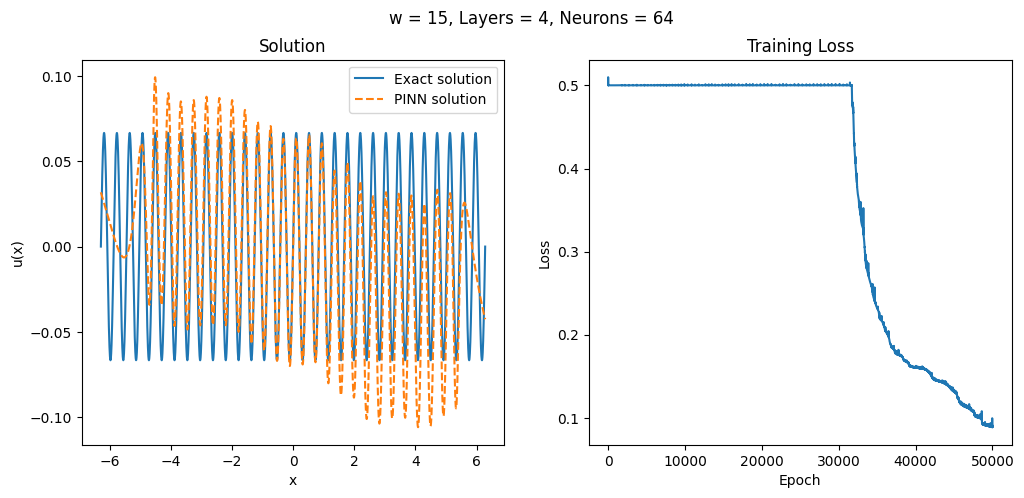

Training for w = 15, Layers = 5, Neurons = 128
Epoch 0, Loss: 0.5062905550003052
Epoch 5000, Loss: 0.5001633167266846
Epoch 10000, Loss: 0.5001665353775024
Epoch 15000, Loss: 0.5001609921455383
Epoch 20000, Loss: 0.5001648664474487
Epoch 25000, Loss: 0.5001547932624817
Epoch 30000, Loss: 0.04416396841406822
Epoch 35000, Loss: 0.007565043866634369
Epoch 40000, Loss: 0.0033908875193446875
Epoch 45000, Loss: 0.0007631162879988551


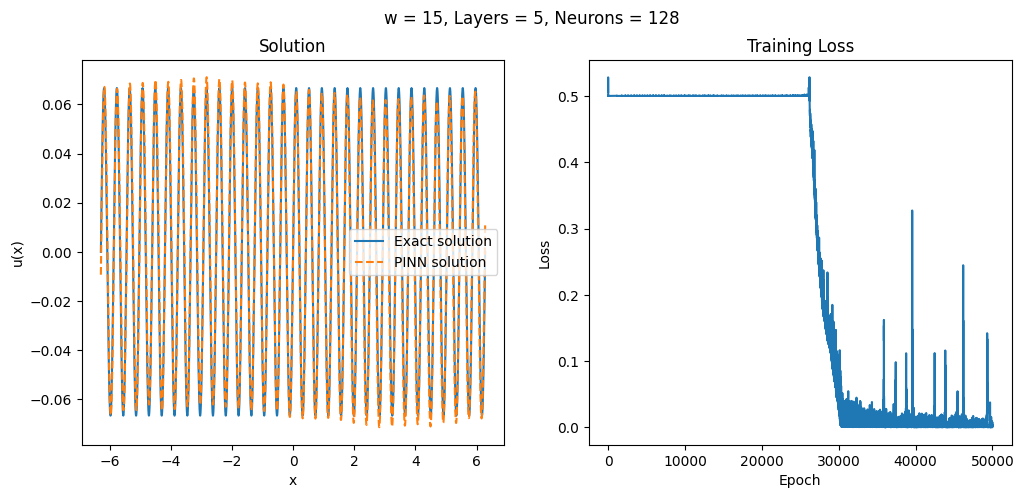

In [14]:
for w in w_values:
    for layers, neurons in architectures:
        print(f'Training for w = {w}, Layers = {layers}, Neurons = {neurons}')

        # Definicja modelu
        model = FCN(1, 1, neurons, layers)

        # Definicja punktów treningowych i testowych
        x_boundary = torch.tensor([[0.0]], requires_grad=True)
        x_physics = torch.linspace(-2 * np.pi, 2 * np.pi, train_points[w_values.index(w)]).view(-1, 1).requires_grad_(True)
        x_test = torch.linspace(-2 * np.pi, 2 * np.pi, test_points[w_values.index(w)]).view(-1, 1)
        u_exact = exact_solution(x_test, w)

        # Trening modelu
        losses = train_PINN(model, x_boundary, x_physics, w)

        # Przewidywanie wartości
        u_pred = model(x_test).detach().numpy()
        u_exact = u_exact.numpy()

        # Rysowanie wyników
        plot_results(x_test, u_exact, u_pred, losses, f'w = {w}, Layers = {layers}, Neurons = {neurons}')
